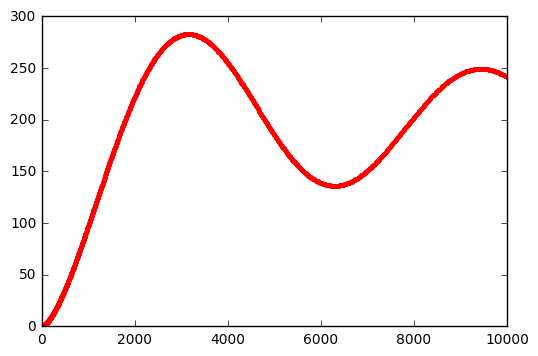

In [7]:
import numpy as np
import tensorflow as tf
import tflearn
import keras
import matplotlib.pyplot as plt

%matplotlib inline

t = np.linspace(0, 100, 1001)
x1 = np.power(t,2)
x2 = np.random.randn(len(t)) 
y = np.sin( x1 / 1000 )

y = np.array([np.sum(y[0:i]) for i in range(len(y))])

trainX = np.stack((x1, x2), axis = 1)
trainY = y
plt.plot(x1, y, 'r.')
#plt.plot(x1, y2, 'b.')

Train on 800 samples, validate on 201 samples
Epoch 1/50
800/800 [==============================] - 31s - loss: 23598.5136 - val_loss: 31558.3733
Epoch 2/50
800/800 [==============================] - 23s - loss: 20199.3386 - val_loss: 26961.5527
Epoch 3/50
800/800 [==============================] - 25s - loss: 17548.9772 - val_loss: 23086.7294
Epoch 4/50
800/800 [==============================] - 23s - loss: 15348.9648 - val_loss: 19704.1849
Epoch 5/50
800/800 [==============================] - 25s - loss: 13564.9289 - val_loss: 16798.5758
Epoch 6/50
800/800 [==============================] - 26s - loss: 11283.1865 - val_loss: 14028.3765
Epoch 7/50
800/800 [==============================] - 25s - loss: 9609.6916 - val_loss: 11621.7018
Epoch 8/50
800/800 [==============================] - 25s - loss: 8145.6453 - val_loss: 9600.5580
Epoch 9/50
800/800 [==============================] - 26s - loss: 7273.2030 - val_loss: 7958.4089
Epoch 10/50
800/800 [==============================] - 26s 

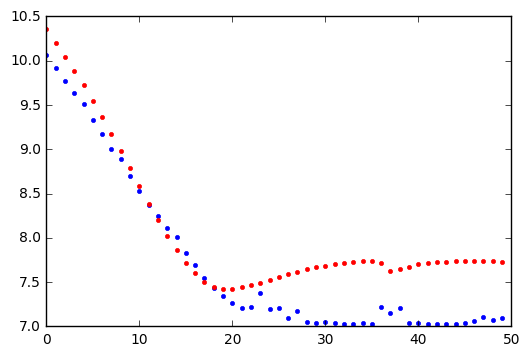

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit( trainX )
trainXscaled = scaler.transform(trainX)

timesteps = 5

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 2)),
    LSTM(400, return_sequences=True),
    LSTM(100),
    Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam')

lstmTrainX = np.zeros([trainXscaled.shape[0], timesteps, 2])
lstmTrainY = np.zeros(trainXscaled.shape[0])

for i in range(timesteps, trainXscaled.shape[0]):
    lstmTrainX[i, :, :] = trainX[i-timesteps:i,:]
    lstmTrainY[i] = trainY[i]



hist = model.fit(lstmTrainX, lstmTrainY, nb_epoch=50, batch_size=5, verbose = 1, validation_split=0.2, shuffle=True)

plt.plot(np.log(hist.history['loss']), 'b.')
plt.plot(np.log(hist.history['val_loss']), 'r.')
plt.show()


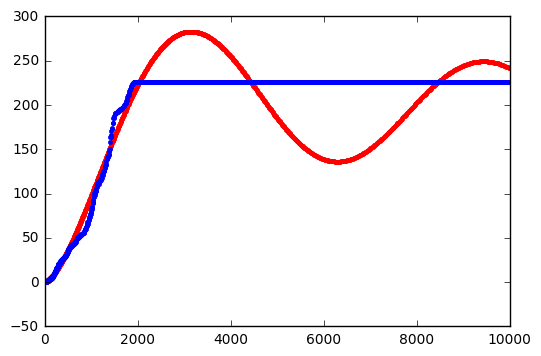

In [11]:
predY = model.predict(lstmTrainX)
plt.plot(x1, y, 'r.')
plt.plot(trainX[:,0], predY, 'b.')